In [1]:
import pandas as pd
data = pd.read_csv('Customers.csv')

In [2]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
91,92,Male,18,59,41
69,70,Female,32,48,47
153,154,Female,38,78,76
140,141,Female,57,75,5
22,23,Female,46,25,5


In [3]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
27,28,61
172,87,10
38,37,26
108,63,43
67,48,48


In [4]:
data = data.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
data.sample(5)

,income,score
38,37,26
4,17,40
39,37,75
94,60,42
108,63,43


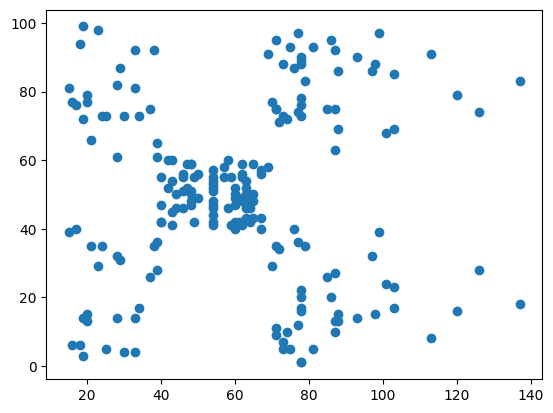

In [5]:
import matplotlib.pylab as plt
plt.scatter(data['income'], data['score'])

In [6]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income', 'score']])
    wcss_error.append(model.inertia_)

In [7]:
wcss_error

[269981.28,
 183811.28277016422,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 37558.92202302528,
 32245.02403574402,
 25388.760028179368,
 21806.812998695455,
 19994.409069463563]

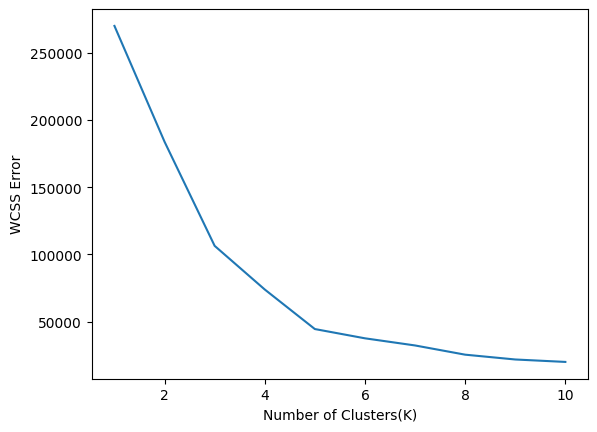

In [9]:
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

In [11]:
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [12]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
data['cluster'] = pred
data.head(5)

,income,score,cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [15]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

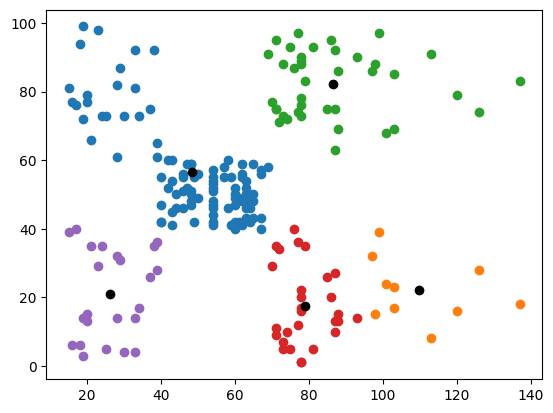

In [20]:
plt.scatter(c1['income'], c1['score'])
plt.scatter(c2['income'], c2['score'])
plt.scatter(c3['income'], c3['score'])
plt.scatter(c4['income'], c4['score'])
plt.scatter(c5['income'], c5['score'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')

In [18]:
model.cluster_centers_

array([[ 48.26      ,  56.48      ],
       [109.7       ,  22.        ],
       [ 86.53846154,  82.12820513],
       [ 78.89285714,  17.42857143],
       [ 26.30434783,  20.91304348]])